In [2]:
#setting the workspace
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 135)

#the file with data was directly downloaded to the root of the repo
data = pd.read_csv('globalterrorismdb_0617dist.csv', engine = 'python')

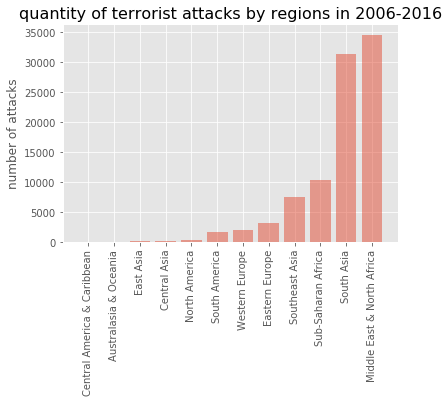

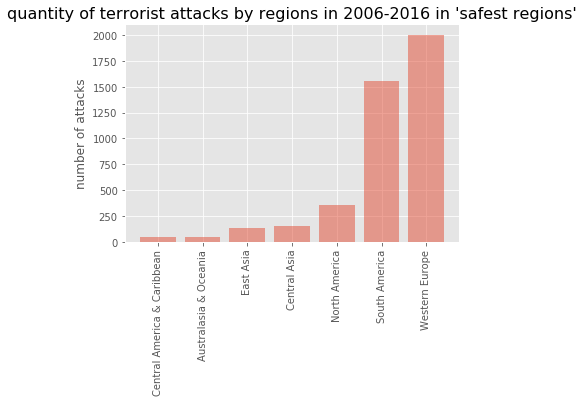

It occures that we need to book the tickets for Central America & Caribbean !


In [3]:
#question 1 - Where to go for holidays? 
#explanation - Number of attacks sorted by 12 regions in past 10 years.

#get data from past 10 years (2006-2016)
data_past_10 = data.loc[data['iyear'] > 2005]

#sum attacks by regions
region_sum = []
for region in np.unique(data_past_10['region_txt']):
    region_sum.append((region, data_past_10.loc[data_past_10['region_txt'] == region].shape[0])) 

#sort the result    
region_sum = sorted(region_sum, key = lambda x: x[1])

#plot
plt.style.use('ggplot')
plt.bar(np.arange(len(region_sum)), [float(value[1]) for value in region_sum], align = 'center', alpha = 0.5)
plt.xticks(np.arange(len(region_sum)), [value[0] for value in region_sum], rotation = 'vertical')
plt.ylabel('number of attacks')
plt.title('quantity of terrorist attacks by regions in 2006-2016', fontsize = 16)
plt.show()

#closer look at 'safe regions'
region_sum = region_sum[:7]
plt.bar(np.arange(len(region_sum)), [float(value[1]) for value in region_sum], align = 'center', alpha = 0.5)
plt.xticks(np.arange(len(region_sum)), [value[0] for value in region_sum], rotation = 'vertical')
plt.ylabel('number of attacks')
plt.title("quantity of terrorist attacks by regions in 2006-2016 in 'safest regions'", fontsize = 16)
plt.show()

#display conclusion
print('It occures that we need to book the tickets for', region_sum[0][0],'!')

Out of 170350 incidents,  5770 ended with a attackers' suicide.
Bombing/Explosion type of attack takes inglorious  93.76083188908146 % of all suicidal attacks. It's no surprise.


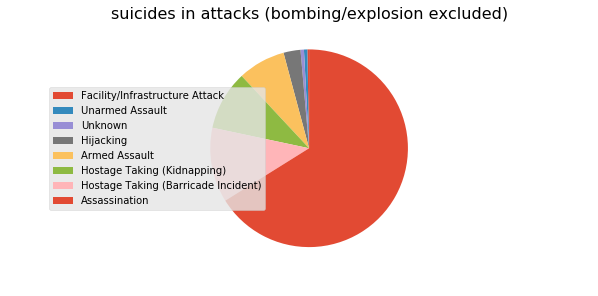

In [4]:
#question 2 - How many perpetrators do have suicidal tendencies*?
#explanation - *https://www.youtube.com/watch?v=Lv2o1U93t2s

#extract data with suicidal perpetrators
suicidal = data.loc[data['suicide'] == 1]

#display introductory info
print('Out of', data.shape[0], 'incidents, ',suicidal.shape[0], "ended with a attackers' suicide.")

#suicidal tendencies grouped by type of attack
att_sum = []
for attack in np.unique(suicidal['attacktype1_txt']):
    att_sum.append((attack, suicidal.loc[suicidal['attacktype1_txt'] == attack].shape[0] / suicidal.shape[0] * 100))
    
#sort results
att_sum = sorted(att_sum, key = lambda x: x[1])
print(att_sum[-1][0], 'type of attack takes inglorious ', att_sum[-1][1], "% of all suicidal attacks. It's no surprise.")
att_sum = att_sum[:-1]

#plot
plt.style.use('ggplot')
fig = plt.figure(10, figsize=(10,10))
ax = fig.add_subplot(211) 
labels = [value[0] for value in att_sum]
ax.set_title('suicides in attacks (bombing/explosion excluded)', fontsize = 16)
ax.axis("equal")
pie = ax.pie([float(value[1]) for value in att_sum], startangle=90)
ax2 = fig.add_subplot(221)
ax2.axis("off") 
ax2.legend(pie[0],labels, loc="center")
plt.show()

2430 of 4455 attacks were successful despite using fake weapon. It's impressive 54.5454545455 %.


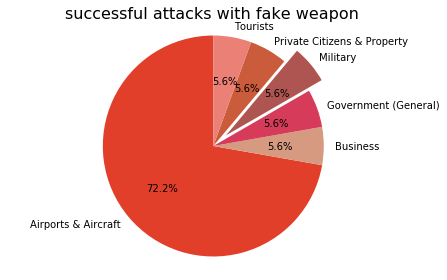

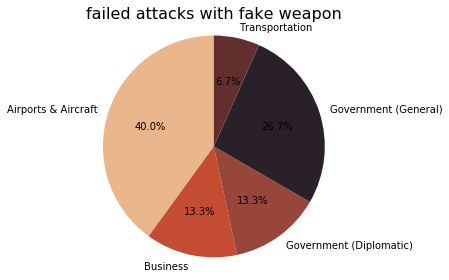

It is worth mentioning that some military guys got tricked even by fake weapons.


In [5]:
#question 3 - Is it worth being fake?
#explanation - Percentage of successful attacks with fake weapon.

#extract data with fake weapon
fake = data.loc[data['weaptype1_txt'] == 'Fake Weapons']
suc = fake.loc[fake['success'] == 1]
fail = fake.loc[fake['success'] == 0]

#success rate
print(suc.size, 'of', fake.size, "attacks were successful despite using fake weapon. It's impressive", suc.size / fake.size *100, '%.')

#get the data about fake weapon attacks by target
suc_sum = []
for targtype in np.unique(suc['targtype1_txt']):
    suc_sum.append((targtype, suc.loc[suc['targtype1_txt'] == targtype].shape[0]))

fail_sum = []
for targtype in np.unique(fail['targtype1_txt']):
    fail_sum.append((targtype, fail.loc[fail['targtype1_txt'] == targtype].shape[0]))    

#plot
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076"]
plt.pie(
    [value[1] for value in suc_sum],
    labels = [value[0] for value in suc_sum],
    shadow = False,
    colors = colors,
    explode = (0, 0, 0, 0.15, 0, 0),
    startangle = 90,
    autopct = '%1.1f%%',
    )
plt.axis('equal')
plt.title('successful attacks with fake weapon', fontsize = 16)
plt.tight_layout()
plt.show()

colors = ["#e9b78b", "#c44c33", "#974639", "#29202a", "#632f2e",]
plt.pie(
    [value[1] for value in fail_sum],
    labels = [value[0] for value in fail_sum],
    shadow = False,
    colors = colors,
    startangle = 90,
    autopct = '%1.1f%%',
    )
plt.axis('equal')
plt.title('failed attacks with fake weapon', fontsize = 16)
plt.tight_layout()
plt.show()

print("It is worth mentioning that some military guys got tricked even by fake weapons.")

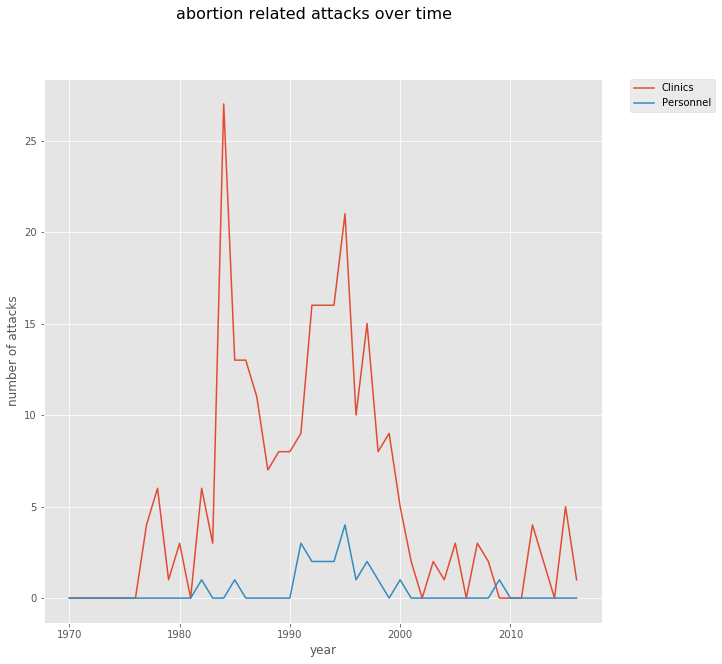

In [6]:
#question 4 - How safe is abortion?
#explanation - Distribution of attacks connected with abortion (clinics and personnel).

#data retrieval
abort = data.loc[data['targtype1_txt'] == 'Abortion Related']

clin = abort.loc[abort['targsubtype1_txt'] == 'Clinics']
per = abort.loc[abort['targsubtype1_txt'] == 'Personnel']

#calculate attacks per year and divide by target
year_list = sorted(np.unique(data['iyear']))
typeat_series = {}
for typeat in np.unique(abort['targsubtype1_txt']):
    series = []
    typeat_idx = data['targsubtype1_txt'] == typeat
    for year in year_list:
        series.append((abort.loc[(data['iyear'] == year) & typeat_idx].shape[0]))
    typeat_series[typeat] = series

#plot
fig = plt.figure(figsize=(10,10))
for typeat, series in typeat_series.items():
    plt.plot(year_list,series, label=typeat)
fig.suptitle('abortion related attacks over time', fontsize = 16)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('year')
plt.ylabel('number of attacks')
plt.show()

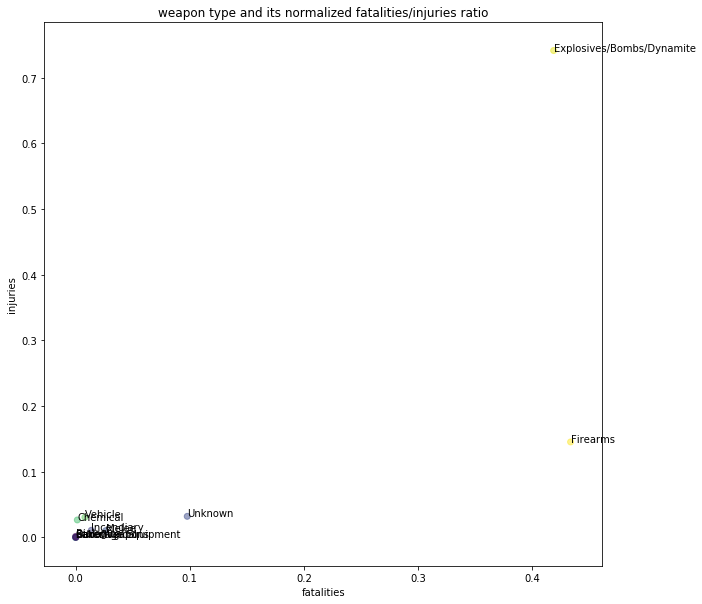

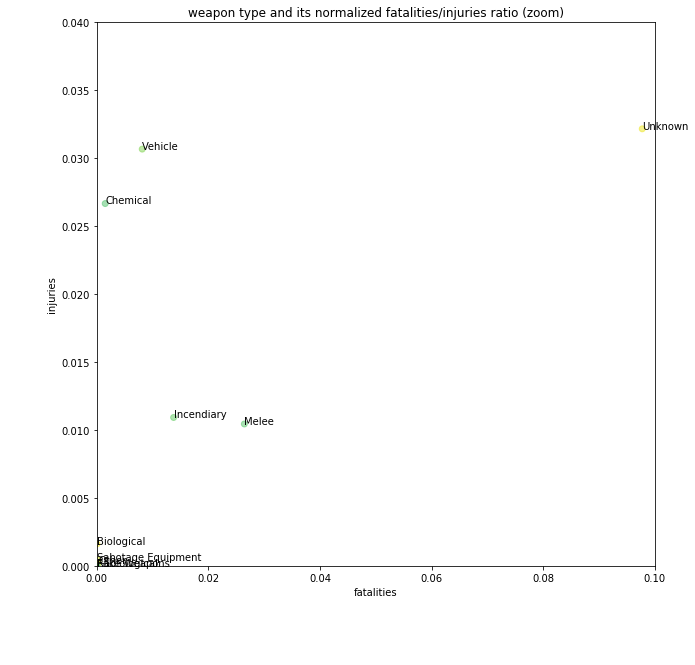

In [51]:
#question 5 - How does weapon type affect number of fatalities and injuries?
#explanation - 

#data
weapon_sum = []
#for weapon in np.unique(data['weaptype1_txt']):
 #   weapon_sum.append((weapon, data.loc[data['weaptype1_txt'] == weapon, 'nwound'].sum[0]))

fatalities = []
injuries = []
for weapon in np.unique(data['weaptype1_txt']):
    fatalities.append((weapon, data.loc[data['weaptype1_txt'] == weapon, 'nkill'].sum()))
    injuries.append((weapon, data.loc[data['weaptype1_txt'] == weapon, 'nwound'].sum()))

#data normalization
z = [value[1] for value in fatalities]
y = [value[1] for value in injuries]

zn = [float(i)/sum(z) for i in z]
yn = [float(i)/sum(y) for i in y]

#plot
n = [value[0] for value in fatalities]
n[11] = 'Vehicle'
colors = np.random.rand(N)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(zn, yn, c=colors, alpha = 0.5)
plt.ylabel('injuries')
plt.xlabel('fatalities')
plt.title('weapon type and its normalized fatalities/injuries ratio')
for i, txt in enumerate(n):
    ax.annotate(txt, (zn[i],yn[i]))
plt.show()


#plot closer look
n = [value[0] for value in fatalities]
n[11] = 'Vehicle'
colors = np.random.rand(N)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(zn, yn, c=colors, alpha = 0.5)
plt.ylabel('injuries')
plt.xlabel('fatalities')
for i, txt in enumerate(n):
    ax.annotate(txt, (zn[i],yn[i]))
plt.title('weapon type and its normalized fatalities/injuries ratio (zoom)')
plt.xlim(0, 0.1)
plt.ylim(0, 0.04)
plt.show()
    

